# Morgan's Exploratory File

## Read Data Files

First, I imported the pandas library in preparation of exploring each csv/tsv file available

In [57]:
import pandas as pd

### Movie Gross

In [58]:
movie_gross = pd.read_csv("data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The movie_gross dataframe contains title, studios, domestic gross revenue, foreign gross revenue, and the year of release.

### Movie Info

In [59]:
movie_info = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This dataframe contains information on genres and directors, which I think may potentially be useful predictors of profit. However, it lacks movie titles, which will make it difficult to merge/join with other datasets to gain more useful insight. 

### Reviews

In [60]:
reviews = pd.read_csv("data/rt.reviews.tsv", encoding='latin-1', sep='\t')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This dataframe contains reviews and ratings, which could be useful if there were also movie titles or some other indicator of which movie is being referenced other than the ID number. 

###  TMDB

In [61]:
tmdb = pd.read_csv("data/tmdb.movies.csv", index_col = 0)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This dataset also has genres listed as ID numbers (much like the Movie Info dataframe). As an added benefit, Landon was able to help me locate a data dictionary for me to replace these integers with their associated genre. However, this dataframe has the advantage of having the title and popularity ranking included in the rows, which the Movie Info dataframe lacked. 

### Movie Budgets

In [62]:
budgets = pd.read_csv("data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Finally, the budgets dataframe contains information on the production budget and worldwide gross revenue. This dataframe is useful for calculating total profit. 

### Initial Curiosities

Based off my first glance at these datasets, I decided to first explore if there is any correlation between genre and profit. Because they share information about movie titles, I decide to utilize both the budgets dataframe as well as the TMDB dataframe.

## Initial Data Cleaning

I decided that the first order of business would be to calculate my measurement of benefit (in this scenario, profit). To do so, I needed to subtract production cost from worldwide revenue. However, these columns weren't ready for me to perform calculations on yet because they were not the correct data type.

I could tell from my initial glance at the budgets dataframe that there were string characters (such as $) in the cells. To confirm which characters I needed to remove before casting this column as an integer, I took a brief look at the first few values. 

In [63]:
budgets['worldwide_gross'].head() # finding strings to remove

0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object

Thus, it is clear that I need to remove $ and , from the values before casting them as integers. 

In [64]:
# removing $ and , from gross revenue
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(",","")
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","")

# casting the values as integers
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

I could also tell that the production_budget column shares these same characters. So, I performed the same operations on this column as well. 

In [65]:
# removing $ and , from production budget
budgets['production_budget'] = budgets['production_budget'].str.replace(",","")
budgets['production_budget'] = budgets['production_budget'].str.replace("$","")

# casting the values as integers
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])

Now that these values were cast as integers, I could create a new column in the dataframe to represent total profit.
Note: I used worldwide gross rather than domestic gross as it appeared to be a more holistic representation of the overall revenue than domestic gross. Because I did not use the domestic gross column in my calculation, I did not dedicate time to cleaning this column. 

In [66]:
# calculating total profit
budgets['total_profit'] =  budgets['worldwide_gross'] - budgets['production_budget']

# confirmation
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


In [67]:
# any nulls?
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   int64 
 6   total_profit       5782 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 316.3+ KB


There doesn't appear to be any nulls or null-like values

## Merging budget and TMDB databases

With this new column created, I began to tackle how I might combine this dataframe with the TMDB dataframe so that I could merge the available information on genres with the available information on profit for the associated movie. 

To do so, I first ensured that the movie titles were the indeces for each of these dataframes. 

In [68]:
budgets.set_index('movie')
tmdb.set_index('title')

,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
Inception,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...,...,...
Laboratory Conditions,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,0.0,1
_EXHIBIT_84xxx_,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
The Last One,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,0.0,1


Once these indeces were set, I joined these dataframes using an inner join. I used an inner join because I currently have no use for movies that appear in one dataframe and not the other. However, I made sure to save this joined dataframe as a separate dataframe, thus preserving the initial dataframes in case I need to refer back to them later. I also set suffixes in case of repeated column names. After merging, I used the .info() method to confirm that I have populated the table adequately.

In [69]:
budgets_and_tmdb = budgets.join(tmdb, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_and_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_budgets            5782 non-null   int64  
 1   release_date_budgets  5782 non-null   object 
 2   movie                 5782 non-null   object 
 3   production_budget     5782 non-null   int64  
 4   domestic_gross        5782 non-null   object 
 5   worldwide_gross       5782 non-null   int64  
 6   total_profit          5782 non-null   int64  
 7   genre_ids             5782 non-null   object 
 8   id_tmdb               5782 non-null   int64  
 9   original_language     5782 non-null   object 
 10  original_title        5782 non-null   object 
 11  popularity            5782 non-null   float64
 12  release_date_tmdb     5782 non-null   object 
 13  title                 5782 non-null   object 
 14  vote_average          5782 non-null   float64
 15  vote_count           

I noticed afterwards that the number of valid rows in each column matched perfectly with the total number of rows in the smaller dataframe (budget). This implied to me that I was able to gather genre information about every movie for which I had profit information. 

I also noticed from this output that my genre_ids column, which I had previously thought contained lists of integers based on what was observed in the first few rows of this dataframe, is actually just strings. In order to create a frequency distribution of the genres, I needed to accomplish the following:

1. Remove brackets and whitespace
2. Replace each genre id with the associated genre
3. Create a new dataframe with genres as columns and cells containing binary values
    0 -> the movie represented in this row is NOT this genre
    1 -> the movie represented in this row IS this genre

In [70]:
# Initialize a dictionary to be transformed into a dataframe
genre_dictionary = {"Title" : [],
                    "Action" : [],
                   "Adventure" : [],
                   "Animation" : [],
                   "Comedy" : [],
                   "Crime" : [],
                   "Documentary" : [],
                   "Drama" : [],
                   "Family" : [],
                   "Fantasy" : [],
                   "History" : [],
                   "Horror" : [],
                   "Music" : [],
                   "Mystery" : [],
                   "Romance" : [],
                   "SciFi" : [],
                   "TV" : [],
                   "Thriller" : [],
                   "War" : [],
                   "Western" : []}

# for each row
for index, lst in budgets_and_tmdb.iterrows():
    
    # remove the brackets from the genre_ids column
    no_chars = lst['genre_ids'].strip('[').strip(']')
    
    # replace each genre id with the associated genre and remove white space
    no_chars_nor_nums = no_chars.replace("28" ,"Action").replace("12","Adventure").replace("16","Animation").replace("35","Comedy").replace("80","Crime").replace("99","Documentary").replace("18","Drama").replace("10751","Family").replace("14","Fantasy").replace("36","History").replace("27","Horror").replace("10402","Music").replace("9648","Mystery").replace("10749", "Romance").replace("878", "SciFi").replace("10770","TV").replace("53","Thriller").replace("10752", "War").replace("37", "Western").replace(" ","")
    
    # For each key in the genre dictionary    
    for key in genre_dictionary.keys():
        
        # if it's the title, append the title
        if key == "Title":
            genre_dictionary['Title'].append(lst['movie'])
            
        #if it's not the title key, then it's a genre key
        
        # if the key is in the list of genres for that movie, append 1
        elif key in no_chars_nor_nums.split(","):
            genre_dictionary[key].append(1)
            
        # else, append 0
        else:
            genre_dictionary[key].append(0)

bin_genre_df = pd.DataFrame(genre_dictionary)
bin_genre_df.head()


,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
0,Avatar,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: On Stranger Tides,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,Dark Phoenix,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Avengers: Age of Ultron,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Star Wars Ep. VIII: The Last Jedi,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Next, I needed to find the sum by genre column in order to visualize the distribution of genres.

In [71]:
genre_sums = {}
for col in bin_genre_df.columns:
    if col != "Title":
        genre_sums[col] = bin_genre_df[col].value_counts()[1]
genre_sums

{'Action': 706,
 'Adventure': 323,
 'Animation': 336,
 'Comedy': 1394,
 'Crime': 353,
 'Documentary': 958,
 'Drama': 1905,
 'Family': 422,
 'Fantasy': 264,
 'History': 127,
 'Horror': 723,
 'Music': 312,
 'Mystery': 274,
 'Romance': 611,
 'SciFi': 358,
 'TV': 155,
 'Thriller': 944,
 'War': 72,
 'Western': 44}

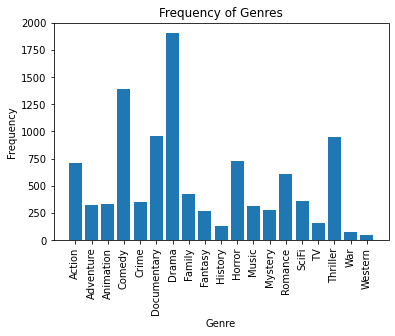

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.bar(x = list(genre_sums.keys()), height = list(genre_sums.values()))
plt.xticks(rotation = 90)
ax.set_title("Frequency of Genres")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency");

It is clear that the most common genre is Drama. Thus, my question is: Is the most popular genre (Drama) significantly more profitable than all other genres?

My plan of action is:
1. Visualize the distributions of profits for all movies other than dramas vs. dramas
2. Calculate the average profit for all movies of all genres other than drama
3. Calculate the average profit for all dramas 
4. Perform a two-sample t-test to see if the average profit for dramas is significantly larger than the average profit for all other genres. 

In [73]:
# set index
bin_genre_df.set_index("Title")

# merge budgets and imdb table with new dummy cols
budgets_tmdb_dummys = budgets.join(bin_genre_df, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_tmdb_dummys.head()

#drop irrelevant cols
cols_to_remove = ["id","release_date","production_budget","domestic_gross","worldwide_gross","movie"]
cols_to_keep = [col for col in budgets_tmdb_dummys.columns if col not in cols_to_remove]
budgets_tmdb_dummys = budgets_tmdb_dummys[cols_to_keep]
budgets_tmdb_dummys.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
0,2351345279,Avatar,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,635063875,Pirates of the Caribbean: On Stranger Tides,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-200237650,Dark Phoenix,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1072413963,Avengers: Age of Ultron,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,999721747,Star Wars Ep. VIII: The Last Jedi,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In order to visualize the histogram of profit for all movies for which the Drama column = 1, I need to first isolate these movies

In [74]:
dramas = budgets_tmdb_dummys.loc[ budgets_tmdb_dummys['Drama'] == 1 ]
dramas.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
15,636860230,Spider-Man 3,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
18,767003568,The Hobbit: An Unexpected Journey,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19,685213767,Harry Potter and the Half-Blood Prince,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
20,710366855,The Hobbit: The Desolation of Smaug,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
23,142085065,Superman Returns,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Lowest profit: $-94635231


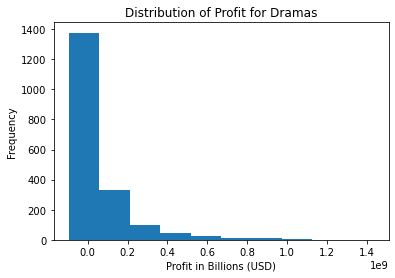

In [75]:
fig, ax = plt.subplots()
ax.hist(dramas['total_profit'])
ax.set_title("Distribution of Profit for Dramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = dramas['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

The data appears greatly skewed and may benefit from a log transformation.

Lowest Log(profit): $9.262553243423117


C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


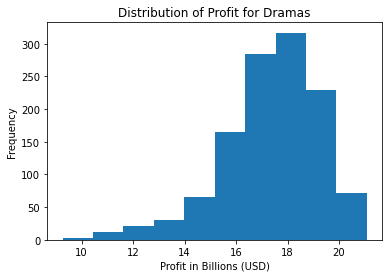

In [76]:
# apply transformation
import numpy as np
log_drama_profit = np.log(dramas['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_drama_profit)
ax.set_title("Distribution of Profit for Dramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = log_drama_profit.min()

print(f"Lowest Log(profit): ${lowest_profit}")

This looks much better, but there is still an evident negative skew. There's two options to proceed:
1. Investigate whether this skew is circumvented by removing movies in which no profit was made (either by removing the rows or replacing them with 0 profit)
2. Proceed with the caveat that the results may not be as accurate by nature of there being a negative skew in the data. 

If I filter by movies that made a profit, the difference in comparison to the original appears minimal at best.

Lowest profit: $10536


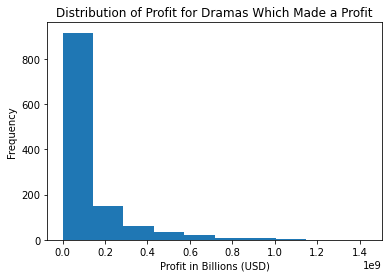

In [77]:
fig, ax = plt.subplots()

dramas_pos_profits = dramas.loc[ dramas['total_profit'] >= 0]


ax.hist(dramas_pos_profits['total_profit'])
ax.set_title("Distribution of Profit for Dramas Which Made a Profit")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = dramas_pos_profits['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

The same applies when the data is transformed by the log. 

Lowest Log(profit): $9.262553243423117


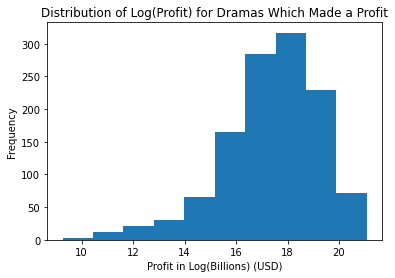

In [78]:
# apply transformation
log_drama_pos_profit = np.log(dramas_pos_profits['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_drama_pos_profit)
ax.set_title("Distribution of Log(Profit) for Dramas Which Made a Profit")
ax.set_xlabel("Profit in Log(Billions) (USD)")
ax.set_ylabel("Frequency");

lowest_profit = log_drama_profit.min()

print(f"Lowest Log(profit): ${lowest_profit}")

Let's try a BoxCox transformation instead.

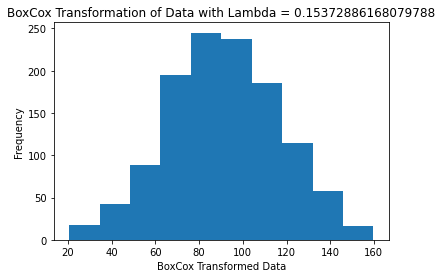

In [79]:
# Resource: https://www.geeksforgeeks.org/box-cox-transformation-using-python/
import scipy.stats as stats

# Box-Cox Transformation in Python
fitted_data, fitted_lambda = stats.boxcox(dramas_pos_profits['total_profit'])

fig, ax = plt.subplots()
ax.hist(fitted_data)
ax.set_title("BoxCox Transformation of Data with Lambda = " + str(fitted_lambda))
ax.set_xlabel("BoxCox Transformed Data")
ax.set_ylabel("Frequency");

This looks SIGNIFICANTLY better. However, I want to make sure I'm not losing a significant portion of observations

In [80]:
dramas.shape

(1905, 21)

In [81]:
dramas_pos_profits.shape

(1200, 21)

In [82]:
1200 / 1905

0.6299212598425197

We retained about 63% of the dataset. I.e, we lost about 37% of the observations because they were unprofitable. 

This is, admittedly, a pretty huge chunk of the dataset. So, we will explore shifting the dataset before applying the BoxCox method (then subtracting the shift from each value) to see if we can circumvent the error that would occur if we passed negative profits into the BoxCox function.

In [83]:
# Resources on shifts:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#:~:text=y%20%3D%20%28x%2A%2Almbda%20-%201%29%20%2F%20lmbda%2C%20for,shift%20parameter%20to%20achieve%20this%3B%20boxcox%20does%20not.
# https://nickcdryan.com/2017/04/19/the-box-cox-transformation/

original_min_positive = (dramas['total_profit'].min())*-1
shift = original_min_positive + 1

dramas['total_profit_shifted'] = dramas['total_profit'].map(lambda x: x+shift)
dramas_shifted_min = dramas['total_profit_shifted'].min()
print(dramas_shifted_min)


1


<ipython-input-83-ad0b91751505>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dramas['total_profit_shifted'] = dramas['total_profit'].map(lambda x: x+shift)


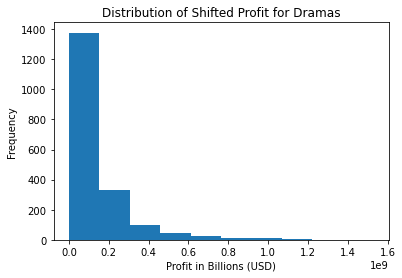

In [84]:
fig, ax = plt.subplots()
ax.hist(dramas['total_profit_shifted'])
ax.set_title("Distribution of Shifted Profit for Dramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

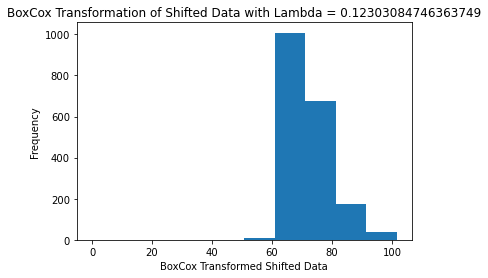

In [85]:
# Box-Cox Transformation in Python 
fitted_data, fitted_lambda = stats.boxcox(dramas['total_profit_shifted'])

fig, ax = plt.subplots()
ax.hist(fitted_data)
ax.set_title("BoxCox Transformation of Shifted Data with Lambda = " + str(fitted_lambda))
ax.set_xlabel("BoxCox Transformed Shifted Data")
ax.set_ylabel("Frequency");

This transformation doesn't appear to be working. Instead, I will fall back on the log transformation and be sure to include the caveat that there may be some variability in the results introduced by the negative skew apparent in the transformed data. 

Now that this data is relatively normally distributed, lets look at the rest of the movies and see what their distribution is like.

First, lets isolate the non-dramas

In [86]:
nondramas = budgets_tmdb_dummys.loc[ budgets_tmdb_dummys['Drama'] == 0 ]
nondramas.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
0,2351345279,Avatar,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,635063875,Pirates of the Caribbean: On Stranger Tides,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-200237650,Dark Phoenix,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1072413963,Avengers: Age of Ultron,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,999721747,Star Wars Ep. VIII: The Last Jedi,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Lowest profit: $-200237650


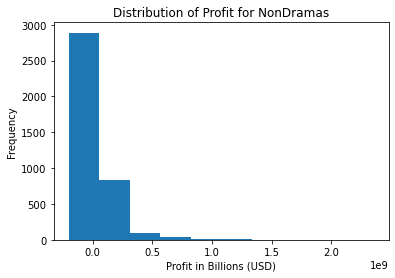

In [87]:
fig, ax = plt.subplots()
ax.hist(nondramas['total_profit'])
ax.set_title("Distribution of Profit for NonDramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = nondramas['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

Lowest Log(profit): $5.855071922202427


C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


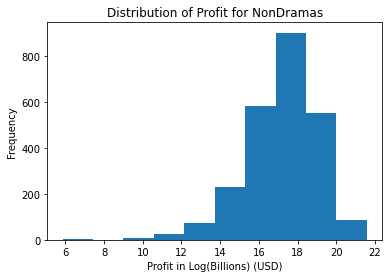

In [88]:
# apply log transformation
log_nondrama_profit = np.log(nondramas['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_nondrama_profit)
ax.set_title("Distribution of Profit for NonDramas")
ax.set_xlabel("Profit in Log(Billions) (USD)")
ax.set_ylabel("Frequency");

lowest_profit = log_nondrama_profit.min()

print(f"Lowest Log(profit): ${lowest_profit}")

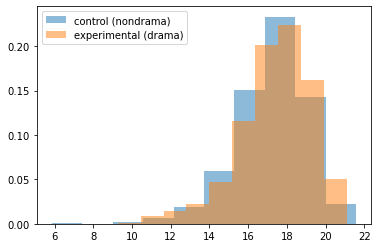

In [89]:
# Plot both distributions on the same figure
plt.hist(log_nondrama_profit, alpha=0.5, label='control (nondrama)', density = True)
plt.hist(log_drama_profit, alpha=0.5, label='experimental (drama)', density = True)
plt.legend()
plt.show()


There doesn't appear to be a significant difference in the general shape of our distributions, but I will test the means anyways to make sure.

In [90]:
# Calculate p-value with stats.ttest_ind

print(log_nondrama_profit.mean())
print(log_drama_profit.mean())

tstat, pval = stats.ttest_ind(log_drama_profit, log_nondrama_profit, nan_policy = 'omit')
print(pval)
print(tstat)
# this doesn't seem right 

17.195775816274278
17.370479037838912
0.007263243039339459
2.686035101108169


In [91]:
print(round(nondramas['total_profit'].mean(),2))
print(round(dramas['total_profit'].mean(),2))

tstat, pval = stats.ttest_ind(dramas['total_profit'], nondramas['total_profit'], nan_policy = 'omit')
print(pval)
print(tstat)
# this doesn't seem right either

56247146.59
67333280.89
0.006673821132605397
2.713677513002227


While the p-value does suggest that there is a significant difference between these distributions (as well as the two original distributions), it simply does not seem plausible given their means and general shape. 

My next idea would be to perform a chi-square test on either drama vs. all nondramas or between all genres to determine if any are associated with significant gains in profit. 

In order to begin this process, I would need to create a contingency table with rows denoting genres and columns denoting "levels" of profitability. In order to create the latter, I would need to somehow standardize the thresholds for these levels. For example:
- High profitability = 2 standard deviations above the mean profit value
- Not high profitability = all else

Alternatively:
- high profitability = 2 standard deviations above the mean profit value
- average profitability = anything within 2 standard deviations of the mean profit value
- low profitability = 2 standard deviations below the mean profit value

In [92]:
average_movie_profit = budgets['total_profit'].mean()
print("The average movie profit is {:,.2f}".format(average_movie_profit))

std_movie_profit = np.std(budgets['total_profit'])
print("The standard deviation is {:,.2f}".format(std_movie_profit))

The average movie profit is 59,899,703.81
The standard deviation is 146,076,247.46


That doesn't seem right. Let's look at the distribution of profits overall. 

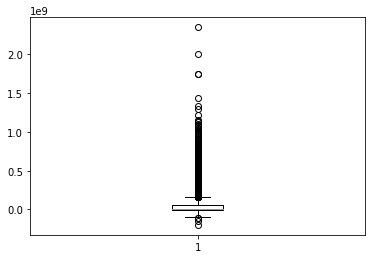

In [93]:
fig, ax = plt.subplots()
ax.boxplot(budgets['total_profit']);

That's an awful lot of range because of some extremely profitable movies. Let's remove the outliers.

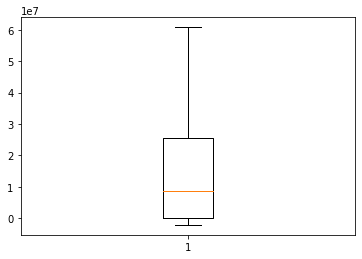

In [94]:
# resource: https://www.statology.org/remove-outliers-python/

#find Q1, Q3, and interquartile range for each column
Q1 = budgets['total_profit'].quantile(q=.25)
Q3 = budgets['total_profit'].quantile(q=.75)
IQR = budgets['total_profit'].apply(stats.iqr)

budgets_iqr = budgets.loc[~((budgets['total_profit'] < (Q1-1.5*IQR)) | (budgets['total_profit'] > (Q3+1.5*IQR)))]

fig, ax = plt.subplots()
ax.boxplot(budgets_iqr['total_profit']);


Do the distributions look better without these outliers?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 13 to 5781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_budgets            2890 non-null   int64  
 1   release_date_budgets  2890 non-null   object 
 2   movie                 2890 non-null   object 
 3   production_budget     2890 non-null   int64  
 4   domestic_gross        2890 non-null   object 
 5   worldwide_gross       2890 non-null   int64  
 6   total_profit          2890 non-null   int64  
 7   genre_ids             2890 non-null   object 
 8   id_tmdb               2890 non-null   int64  
 9   original_language     2890 non-null   object 
 10  original_title        2890 non-null   object 
 11  popularity            2890 non-null   float64
 12  release_date_tmdb     2890 non-null   object 
 13  title                 2890 non-null   object 
 14  vote_average          2890 non-null   float64
 15  vote_count          

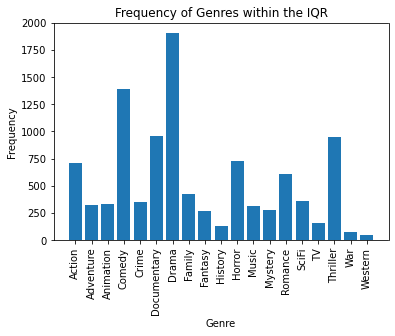

In [95]:
budgets_iqr.set_index('movie')

budgets_iqr_and_tmdb = budgets_iqr.join(tmdb, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_iqr_and_tmdb.info()

# Initialize a dictionary to be transformed into a dataframe
iqr_genre_dictionary = {"Title" : [],
                    "Action" : [],
                   "Adventure" : [],
                   "Animation" : [],
                   "Comedy" : [],
                   "Crime" : [],
                   "Documentary" : [],
                   "Drama" : [],
                   "Family" : [],
                   "Fantasy" : [],
                   "History" : [],
                   "Horror" : [],
                   "Music" : [],
                   "Mystery" : [],
                   "Romance" : [],
                   "SciFi" : [],
                   "TV" : [],
                   "Thriller" : [],
                   "War" : [],
                   "Western" : []}

# for each row
for index, lst in budgets_iqr_and_tmdb.iterrows():
    
    # remove the brackets from the genre_ids column
    no_chars = lst['genre_ids'].strip('[').strip(']')
    
    # replace each genre id with the associated genre and remove white space
    no_chars_nor_nums = no_chars.replace("28" ,"Action").replace("12","Adventure").replace("16","Animation").replace("35","Comedy").replace("80","Crime").replace("99","Documentary").replace("18","Drama").replace("10751","Family").replace("14","Fantasy").replace("36","History").replace("27","Horror").replace("10402","Music").replace("9648","Mystery").replace("10749", "Romance").replace("878", "SciFi").replace("10770","TV").replace("53","Thriller").replace("10752", "War").replace("37", "Western").replace(" ","")
    
    # For each key in the genre dictionary    
    for key in iqr_genre_dictionary.keys():
        
        # if it's the title, append the title
        if key == "Title":
            iqr_genre_dictionary['Title'].append(lst['movie'])
            
        #if it's not the title key, then it's a genre key
        
        # if the key is in the list of genres for that movie, append 1
        elif key in no_chars_nor_nums.split(","):
            iqr_genre_dictionary[key].append(1)
            
        # else, append 0
        else:
            iqr_genre_dictionary[key].append(0)

iqr_bin_genre_df = pd.DataFrame(genre_dictionary)
iqr_bin_genre_df.head()

iqr_genre_sums = {}
for col in iqr_bin_genre_df.columns:
    if col != "Title":
        iqr_genre_sums[col] = iqr_bin_genre_df[col].value_counts()[1]
iqr_genre_sums

fig, ax = plt.subplots()
ax.bar(x = list(iqr_genre_sums.keys()), height = list(iqr_genre_sums.values()))
plt.xticks(rotation = 90)
ax.set_title("Frequency of Genres within the IQR")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency");


In [96]:
# set index
iqr_bin_genre_df.set_index("Title")

# merge budgets and imdb table with new dummy cols
budgets_iqr_tmdb_dummys = budgets_iqr.join(iqr_bin_genre_df, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_iqr_tmdb_dummys.head()

#drop irrelevant cols
cols_to_remove = ["id","release_date","production_budget","domestic_gross","worldwide_gross","movie"]
cols_to_keep = [col for col in budgets_iqr_tmdb_dummys.columns if col not in cols_to_remove]
budgets_iqr_tmdb_dummys = budgets_iqr_tmdb_dummys[cols_to_keep]
budgets_iqr_tmdb_dummys.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
13,7778100,John Carter,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61,19535492,Green Lantern,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,2687603,Jack the Giant Slayer,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
88,47784,Hugo,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
89,35098356,Valerian and the City of a Thousand Planets,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [97]:
dramas_iqr = budgets_iqr_tmdb_dummys.loc[ budgets_iqr_tmdb_dummys['Drama'] == 1 ]
dramas_iqr.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
88,47784,Hugo,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
90,2982519,Jupiter Ascending,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
122,36627518,Tomorrowland,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
133,13038324,Cowboys and Aliens,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
143,57986320,The Sorcerer's Apprentice,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


Lowest profit: $-2000000


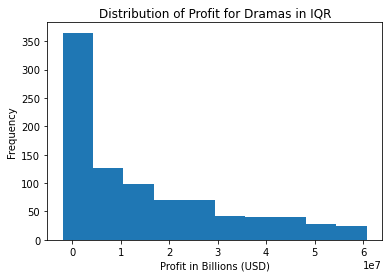

In [98]:
fig, ax = plt.subplots()
ax.hist(dramas_iqr['total_profit'])
ax.set_title("Distribution of Profit for Dramas in IQR")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = dramas_iqr['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

Lowest Log(profit): $9.262553243423117


C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


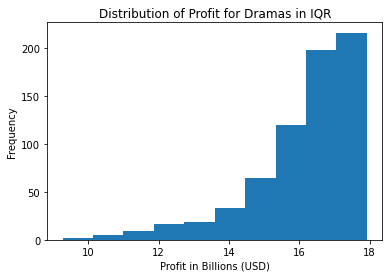

In [99]:
# apply transformation
import numpy as np
log_drama_iqr_profit = np.log(dramas_iqr['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_drama_iqr_profit)
ax.set_title("Distribution of Profit for Dramas in IQR")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = log_drama_iqr_profit.min()

print(f"Lowest Log(profit): ${lowest_profit}")

Ok, looks like we're sticking to ChiSquare for now. Back to defining high vs. medium vs. low profitability.

In [100]:
budgets_iqr_tmdb_dummys['total_profit'].describe()

count    2.890000e+03
mean     1.496507e+07
std      1.712078e+07
min     -2.178990e+06
25%      1.307508e+05
50%      8.550286e+06
75%      2.537178e+07
max      6.083874e+07
Name: total_profit, dtype: float64

In [101]:
# My resource for the chisquare test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

Now that I've done some research and feel confident about using a chi-square test for this dataset, here's my plan for action.
1. Assign high/medium/low profitability based on 75th percentile and above / 25th - 75th percentile / and 25th percentile and lower
    - Create a new column for relative profit and use newly defined threshold variables to filter each movie into these categories (can't use the old ones because we used it to filter out outliers)
2. Create a contingency table with genres on the rows and relative profit on the columns. 
    - use iterrows to itterrate through each row and their genre. For each genre present in the genre column, add one count to the appropriate profit column. For example, if a movie is a drama and generated high profit, add 1 to the cell appropriate for that genre and profit category. If a movie is a drama and an animation and generated high profit, add 1 to the cell appropriate for dramas with high profit and 1 to the cell appropriate for animations with high profit. 
3. use the appropriate scipy stats function to calculate the p-value
    - chi2_contingency

In [102]:
# define thresholds
iqr_Q1 = budgets_iqr_tmdb_dummys['total_profit'].quantile(q=.25)
iqr_Q3 = budgets_iqr_tmdb_dummys['total_profit'].quantile(q=.75)

In [103]:
# assign categories based on thresholds
budgets_iqr_tmdb_dummys.loc[ budgets_iqr_tmdb_dummys['total_profit'] >= iqr_Q3, 'relative_profit_cat'] = 'high'
budgets_iqr_tmdb_dummys.loc[ budgets_iqr_tmdb_dummys['total_profit'] <= iqr_Q1, 'relative_profit_cat'] = 'low'
budgets_iqr_tmdb_dummys.loc[ budgets_iqr_tmdb_dummys['relative_profit_cat'].isna() , 'relative_profit_cat'] = 'medium'

budgets_iqr_tmdb_dummys.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western,relative_profit_cat
13,7778100,John Carter,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,medium
61,19535492,Green Lantern,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,medium
65,2687603,Jack the Giant Slayer,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,medium
88,47784,Hugo,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,low
89,35098356,Valerian and the City of a Thousand Planets,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,high


In [104]:
genres = []

for column in budgets_iqr_tmdb_dummys.columns:
    ignored_cols = ['total_profit','Title','relative_profit_cat']  
    if column not in ignored_cols:
        genres.append(column)
        
contingency_table = pd.DataFrame(columns = ['high', 'medium', 'low'], index = genres)
contingency_table.reset_index(inplace = True)
contingency_table.head()
contingency_table = contingency_table.fillna(0)
contingency_table.head()

,index,high,medium,low
0,Action,0,0,0
1,Adventure,0,0,0
2,Animation,0,0,0
3,Comedy,0,0,0
4,Crime,0,0,0


In [105]:
# resource: https://www.geeksforgeeks.org/how-to-set-cell-value-in-pandas-dataframe/

# for each row
for index, lst in budgets_iqr_tmdb_dummys.iterrows():
    
    # for each cell in that row that isn't profit, profit category, or title (i.e., genres)
    for col in budgets_iqr_tmdb_dummys.columns:
        
        ignored_cols = ['total_profit','Title','relative_profit_cat']
        
        if col not in ignored_cols:
    
    # if it's 1, find the index associated with that column name in the contingency table
            if lst[col] == 1 :
            
                genre_idx = contingency_table[contingency_table['index'] == col].index.values
                
    # look at the profit category column and save that value as well
    
                profit_cat = lst['relative_profit_cat']
    
    # find the cell associated with that row and column in the contingency table and add 1 
    
                contingency_table.loc[genre_idx, profit_cat] += 1   
                
contingency_table.head()

,index,high,medium,low
0,Action,83,174,88
1,Adventure,35,77,42
2,Animation,46,74,47
3,Comedy,169,349,185
4,Crime,37,78,53


In [106]:
# create total cols and rows

#contingency_table['row_totals'] = contingency_table['high'] + contingency_table['medium'] + contingency_table['low']
#contingency_table

In [107]:
#high_total = contingency_table['high'].sum()
#medium_total = contingency_table['medium'].sum()
#low_total = contingency_table['low'].sum()
#all_total = contingency_table['row_totals'].sum()

#contingency_table.loc[len(contingency_table.index)] = ["column_totals", high_total, medium_total, low_total, all_total]
#contingency_table

In [108]:
contingency_table = contingency_table.set_index('index')

In [109]:
contingency_table

,high,medium,low
index,,,
Action,83,174,88
Adventure,35,77,42
Animation,46,74,47
Comedy,169,349,185
Crime,37,78,53
Documentary,129,252,96
Drama,220,447,239
Family,44,98,66
Fantasy,38,56,33


In [112]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_table)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.6712056437454075
Independent (H0 holds true)
